# Visualisering av pi-estimatene

In [13]:
from pylab import uniform, sqrt, plot, xlim, ylim, axis, zeros, xlabel, ylabel, title

### Kode for å simulere dartkast

Når vi kaster en dartpil så lander den ett eller annet tilfeldig sted på enhetskvadratet. For å simulere dette kan vi lage en funksjon som trekker et x-koordinat tilfeldig mellom -1 og 1 og et y-koordinat tilfeldig mellom -1 og 1. Dette kan vi gjøre med `uniform`-funksjonen i pylab

In [14]:
def kast_dart():
    """Kast en tilfeldig dart og returner koordinatene til kastet (x og y skal være mellom -1 og 1)
    """
    x_koordinat = uniform(-1, 1)
    y_koordinat = uniform(-1, 1)
    
    return x_koordinat, y_koordinat

def finn_hypotenus(katet1, katet2):
    """Tar inn katetene i en rettvinklet trekant og returnerer lengden til hypotenus
    """
    return sqrt(katet1**2 + katet2**2)

def traff_blinken(dart_x, dart_y):
    """Tar inn koordinater til dartkast returnerer True dersom darten traff og False dersom den ikke traff
    """
    avstand_origo = finn_hypotenus(dart_x, dart_y)
    return avstand_origo < 1

## BONUS: Plotte alle våre estimerte pi-verdier

En ting som kan være nyttig, er å se hva våre estimat for pi er etter hvert som vi kaster flere og flere kast. Dette kan vi gjøre ved å opprette en array `alle_pi_estimat` som regner ut estimatet på pi for hvert kast som går, så kan vi plotte denne til slutt

Text(0.5, 1.0, 'Endelig pi-estimat: 3.096')

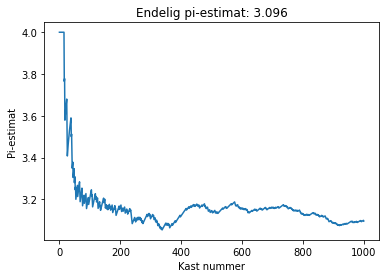

In [15]:
antall_kast = 1000
antall_treff = 0
alle_pi_estimat = zeros(antall_kast)


for kast in range(antall_kast):
    dart_x, dart_y = kast_dart()
    if traff_blinken(dart_x, dart_y):
        antall_treff += 1
          
    estimert_sannsynlighet = antall_treff/(kast+1)  # Husk, Python starter å telle fra 0
    estimert_pi = 4*estimert_sannsynlighet

    alle_pi_estimat[kast] = estimert_pi

plot(alle_pi_estimat)
xlabel("Kast nummer")
ylabel("Pi-estimat")
title(f"Endelig pi-estimat: {estimert_pi}")

## Animasjon av dartkast

Det kan være gøy å se en animasjon av dartkastene våre og hva vi estimerer at $pi$ er etter hvert kast. 

In [32]:
from matplotlib import animation
from pylab import zeros, figure, title, close
from IPython.display import display, HTML


# Kode 
antall_kast = 100
alle_dart_x = zeros(antall_kast)
alle_dart_y = zeros(antall_kast)
alle_estimert_pi = zeros(antall_kast)
antall_treff = 0
for kast in range(antall_kast):
    dart_x, dart_y = kast_dart()

    if traff_blinken(dart_x, dart_y):
        antall_treff += 1
          
    estimert_sannsynlighet = antall_treff/(kast+1)
    estimert_pi = 4*estimert_sannsynlighet

    alle_dart_x[kast] = dart_x
    alle_dart_y[kast] = dart_y
    alle_estimert_pi[kast] = estimert_pi


    
def oppdater_tegning(kast_nummer):
    # Å lage en animasjon tar litt tid, så her er litt kode for å se fremdriften
    fremdrift_prosentfaktor = kast_nummer / antall_kast
    print(f"{fremdrift_prosentfaktor:.0%}", end="\r")  # Skriv ut hvor langt vi har kommet
    # end="\r" passer på at neste print overskriver denne beskjeden
    
    # Animasjonskode
    dart_x = alle_dart_x[kast_nummer]
    dart_y = alle_dart_y[kast_nummer]
    estimert_pi = alle_estimert_pi[kast_nummer]

    title(f"Estimert pi: {estimert_pi:.4f}")
    if traff_blinken(dart_x, dart_y):
        plot(dart_x, dart_y, 'x', color='forestgreen')
    else:
        plot(dart_x, dart_y, 'x', color='orangered')
    
    
animasjonsfigur = figure(figsize=(5, 5))
axis("square")
xlim(-1, 1)
ylim(-1, 1)

# Lag instrukser for animasjonen
animasjon = animation.FuncAnimation(animasjonsfigur, oppdater_tegning, frames=antall_kast)

# Lag animasjon på format som kan vises frem i en nettleser
html_video = animasjon.to_html5_video()
display(HTML(html_video))

# Lukk animasjonsfiguren slik at den ikke vises på skjermen
close(animasjonsfigur)